In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import h5py
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter
import glob
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import train
from random import shuffle
import imp
import os
from PIL import Image, ImageFont, ImageDraw, ImageEnhance
%matplotlib inline

Using TensorFlow backend.


In [2]:
characters = [k.split('/')[2] for k in glob.glob('./characters/*') if len([p for p in glob.glob(k+'/*') if 'edited' in p or 'pic_vid' in p]) > 290]
map_characters = dict(enumerate(characters))
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}

In [3]:
imp.reload(train)
## Just creating dataset
X_train, X_test, y_train, y_test = train.get_dataset(save=True)

Train (14317, 64, 64, 3) (14317, 18)
Test (2527, 64, 64, 3) (2527, 18)
bart_simpson : 1028 train pictures & 148 test pictures
lisa_simpson : 1018 train pictures & 158 test pictures
charles_montgomery_burns : 1010 train pictures & 166 test pictures
homer_simpson : 1010 train pictures & 166 test pictures
moe_szyslak : 1007 train pictures & 169 test pictures
marge_simpson : 998 train pictures & 178 test pictures
principal_skinner : 996 train pictures & 180 test pictures
krusty_the_clown : 982 train pictures & 194 test pictures
ned_flanders : 974 train pictures & 202 test pictures
milhouse_van_houten : 890 train pictures & 189 test pictures
chief_wiggum : 854 train pictures & 132 test pictures
abraham_grampa_simpson : 788 train pictures & 125 test pictures
sideshow_bob : 745 train pictures & 132 test pictures
apu_nahasapeemapetilon : 526 train pictures & 97 test pictures
kent_brockman : 429 train pictures & 69 test pictures
edna_krabappel : 385 train pictures & 72 test pictures
comic_book_

#### Four convulational layers

##### Same pictures training/testing

In [4]:
# Training in the notebook
X_train, X_test, y_train, y_test = train.get_dataset()
model, opt = train.create_model_four_conv(X_train.shape[1:])
model.compile(loss='categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])
model, history = train.training(model, X_train, X_test, y_train, y_test, 
                                data_augmentation=True)


Train (14317, 64, 64, 3) (14317, 18)
Test (2527, 64, 64, 3) (2527, 18)
bart_simpson : 1017 train pictures & 159 test pictures
principal_skinner : 1011 train pictures & 165 test pictures
marge_simpson : 1006 train pictures & 170 test pictures
lisa_simpson : 999 train pictures & 177 test pictures
ned_flanders : 994 train pictures & 182 test pictures
charles_montgomery_burns : 993 train pictures & 183 test pictures
krusty_the_clown : 993 train pictures & 183 test pictures
homer_simpson : 987 train pictures & 189 test pictures
moe_szyslak : 981 train pictures & 195 test pictures
milhouse_van_houten : 926 train pictures & 153 test pictures
chief_wiggum : 854 train pictures & 132 test pictures
abraham_grampa_simpson : 778 train pictures & 135 test pictures
sideshow_bob : 749 train pictures & 128 test pictures
apu_nahasapeemapetilon : 523 train pictures & 100 test pictures
kent_brockman : 432 train pictures & 66 test pictures
comic_book_guy : 390 train pictures & 79 test pictures
edna_krabapp

In [5]:
## Training on AWS
#X_train, X_test, y_train, y_test = train.get_dataset(load=True)
#model = keras.models.load_model('./models/model_08_06.h5')
#with open('./models/history06_19.pkl', 'rb') as f:
#    history = pickle.load(f)

In [6]:
# Loading from callbacks
#imp.reload(train)
#model = train.load_model_from_checkpoint('./models/weights.best_6conv2.hdf5', six_conv=True)
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')


                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.00      0.00      0.00       135
  apu_nahasapeemapetilon       0.00      0.00      0.00       100
            bart_simpson       0.00      0.00      0.00       159
charles_montgomery_burns       0.00      0.00      0.00       183
            chief_wiggum       0.00      0.00      0.00       132
          comic_book_guy       0.00      0.00      0.00        79
          edna_krabappel       0.00      0.00      0.00        85
           homer_simpson       0.00      0.00      0.00       189
           kent_brockman       0.00      0.00      0.00        66
        krusty_the_clown       0.07      1.00      0.14       183
            lisa_simpson       0.00      0.00      0.00       177
           marge_simpson       0.00      0.00      0.00       170
     milhouse_van_houten       0.00      0.00      0.00       153
             moe_szyslak       0.00      0.00      0.00       195
        

/home/cenk/.virtualenvs/simpson/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TypeError: 'History' object is not subscriptable

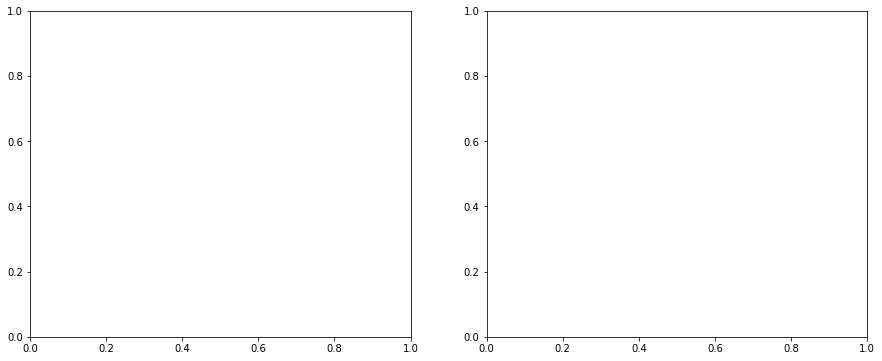

In [7]:
epochs= range(200)
f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(epochs, history['loss'], label='loss')
ax[0].plot(epochs, history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(epochs, history['acc'], label='acc')
ax[1].plot(epochs, history['val_acc'], label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [ ]:
with open('./models/history06_19.pkl', 'rb') as f:
    history = pickle.load(f)
epochs= range(40)
f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(epochs, history['loss'], label='loss')
ax[0].plot(epochs, history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(epochs, history['acc'], label='acc')
ax[1].plot(epochs, history['val_acc'], label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [ ]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_characters.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

##### With BGR/RGB

In [ ]:
X_test2 = []
for img in X_test:
    X_test2.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
X_test2 = np.array(X_test2)
model = keras.models.load_model('./models/model_BGR.h5')
y_pred = model.predict(X_test2)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')

#### Six convolutional layers 

In [ ]:
## Training on AWS
X_train, X_test, y_train, y_test = train.get_dataset(load=True)
model = keras.models.load_model('./models/model_sixconv.h5')
with open('./models/history2.pkl', 'rb') as f:
    history = pickle.load(f)
y_pred = model.predict(X_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')

In [ ]:
epochs= range(40)
f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(epochs, history['loss'], label='loss')
ax[0].plot(epochs, history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(epochs, history['acc'], label='acc')
ax[1].plot(epochs, history['val_acc'], label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

In [ ]:
## -> More overfitting

#### Predict from url

In [ ]:
import urllib
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

def plot_and_predict(url, all_perc=False):
    image = url_to_image(url)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    pic = cv2.resize(image, (pic_size,pic_size))
    a = model.predict_proba(pic.reshape(1, pic_size, pic_size,3))[0]
    if all_perc:
        print('\n'.join(['{} : {}%'.format(map_characters[i], round(k*100)) for i,k in sorted(enumerate(a), key=lambda x:x[1], reverse=True)]))
    else:
        return map_characters[np.argmax(a)].replace('_',' ').title()

In [ ]:
url = "https://vignette3.wikia.nocookie.net/simpsons/images/2/25/Adult_burns.jpg/revision/latest?cb=20111012170021"
plot_and_predict(url)

#### Generating and plotting

In [ ]:
from mpl_toolkits.axes_grid1 import AxesGrid
map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'homer_simpson', 
    6: 'krusty_the_clown', 7: 'lisa_simpson', 8: 'marge_simpson', 
    9: 'milhouse_van_houten', 10: 'moe_szyslak', 11: 'ned_flanders', 
    12: 'principal_skinner', 13: 'sideshow_bob'}

F = plt.figure(1, (15,20))
grid = AxesGrid(F, 111,  # similar to subplot(141)
                nrows_ncols=(3, 4),
                axes_pad=0,
                label_mode="1")

for i in range(12):
    char = map_characters[i]
    image = cv2.imread(np.random.choice([k for k in glob.glob('./characters/%s/*' % char) if 'pic_vid' in k]))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(image, (64, 64)).astype('float32') / 255.
    a = model.predict(pic.reshape(1, 64, 64,3))[0]
    actual = char.split('_')[0].title()
#     pred = map_characters[np.argmax(a)].split('_')[0].title()
    text = sorted(['{:s} : {:.1f}%'.format(map_characters[k].split('_')[0].title(), 100*v) for k,v in enumerate(a)], 
       key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:3]
    img = cv2.resize(img, (352, 352))
    cv2.rectangle(img, (0,260),(215,352),(255,255,255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Actual : %s' % actual, (10, 280), font, 0.7,(0,0,0),2,cv2.LINE_AA)
    for k, t in enumerate(text):
        cv2.putText(img, t,(10, 300+k*18), font, 0.65,(0,0,0),2,cv2.LINE_AA)
#     cv2.putText(img, 'Pred : %s' % pred, (100, 310), font, 0.7,(0,0,0),2,cv2.LINE_AA)    
    grid[i].imshow(img)

#### Finding a threshold

In [ ]:
y_pred = model.predict(X_test, verbose=0)
comp = np.argmax(y_test, axis=1) == np.argmax(y_pred, axis=1)
index_good, index_false = [i for i, x in enumerate(comp) if x], [i for i, x in enumerate(comp) if not x]

In [ ]:
max_good = np.max(y_pred[index_good], axis=1)
max_wrong = np.max(y_pred[index_false], axis=1)
diff_good = np.diff(np.sort(y_pred[index_good], axis=1)[:, 16:])
diff_wrong = np.diff(np.sort(y_pred[index_false], axis=1)[:, 16:])
std_good = np.std(y_pred[index_good], axis=1)
std_wrong = np.std(y_pred[index_false], axis=1)

print("For good predictions : Max : {:.2f}, Difference Two First : {:.3f}, STD : {:.2f}".format(np.mean(max_good),
                                                                            np.mean(diff_good),
                                                                            np.mean(std_good)))
print("For wrong predictions : Max : {:.2f}, Difference Two First : {:.3f}, STD : {:.2f}".format(np.mean(max_wrong),
                                                                             np.mean(diff_wrong),
                                                                            np.mean(std_wrong)))

In [ ]:
f, ax = plt.subplots(ncols=3, figsize=(19,6))
ax[0].scatter(x = diff_good, y= max_good, c='red', marker='+', label = 'good pred')
ax[0].scatter(x = diff_wrong, y= max_wrong, c='green', marker='o', label = 'wrong pred')
ax[0].legend()
ax[0].set_xlabel('Probability difference between the 2 best candidates')
ax[0].set_ylabel('Probability of the best prediction')

ax[1].scatter(x = diff_good, y= std_good, c='red', marker='+', label = 'good pred')
ax[1].scatter(x = diff_wrong, y= std_wrong, c='green', marker='o', label = 'wrong pred')
ax[1].legend()
ax[1].set_xlabel('Probability difference between the 2 best candidates')
ax[1].set_ylabel('Standard deviation of the prediction')

ax[2].scatter(x = max_good, y= std_good, c='red', marker='+', label = 'good pred')
ax[2].scatter(x = max_wrong, y= std_wrong, c='green', marker='o', label = 'wrong pred')
ax[2].legend()
ax[2].set_xlabel('Probability of the best prediction')
ax[2].set_ylabel('Standard deviation of the prediction')

In [ ]:
## FOR LISA
id_lisa = 10
index_lisa = [i for i, x in enumerate(np.argmax(y_pred, axis= 1) == id_lisa) if x]
index_good_lisa, index_wrong_lisa = [k for k in index_lisa if k in index_good], [k for k in index_lisa if k in index_false]

In [ ]:
dicts = {'max':{'good':np.max(y_pred[index_good_lisa], axis=1), 
                'wrong': np.max(y_pred[index_wrong_lisa], axis=1)},
        'diff':{'good':np.diff(np.sort(y_pred[index_good_lisa], axis=1)[:, 16:]), 
                'wrong': np.diff(np.sort(y_pred[index_wrong_lisa], axis=1)[:, 16:])}, 
        'std':{'good': np.std(y_pred[index_good_lisa], axis=1), 
                'wrong': np.std(y_pred[index_wrong_lisa], axis=1)}}

import itertools
chosen = list(itertools.combinations(dicts.items(),2))
f, ax = plt.subplots(ncols=3, figsize=(19,6))
for i in range(3):
    ax[i].scatter(x = chosen[i][0][1]['good'], y= chosen[i][1][1]['good'], 
                  c='red', marker='+', label = 'good pred')
    ax[i].scatter(x = chosen[i][0][1]['wrong'], y= chosen[i][1][1]['wrong'], 
                  c='green', marker='o', label = 'wrong pred')
    ax[i].legend()
    ax[i].set_xlabel(chosen[i][0][0])
    ax[i].set_ylabel(chosen[i][1][0])

#### Threshold and Precision/Recall

In [ ]:
y_pred = model.predict(X_test, verbose=0)
indices = [round(k*0.01,2) for k in range(0, 100, 5)] + [0.99]
pos_characters = {cl: {k:[] for k in indices} for cl in map_characters}
for k in indices:
    for i, e in enumerate(y_pred):
        if np.max(e) > k:
            pos_characters[np.argmax(e)][k].append(int(np.argmax(e) == np.argmax(y_test[i])))
pos_characters['ALL'] = {k:np.sum([pos_characters[cl][k] for cl in pos_characters]) for k in indices}                 

In [ ]:
indices = [round(k*0.01, 2)+round(p*0.01,2) for k,p in zip(range(0, 20), range(0, 100, 5))]
pos_characters_2 = {cl: {k:[] for k in indices} for cl in map_characters}
for k in indices:
    for i, e in enumerate(y_pred):
        if np.std(e)+np.max(e) > k:
            pos_characters_2[np.argmax(e)][k].append(int(np.argmax(e) == np.argmax(y_test[i])))
pos_characters_2['ALL'] = {k:np.sum([pos_characters_2[cl][k] for cl in pos_characters_2]) for k in indices}                 

In [ ]:
classes_plot = ["ALL", 10, 7, 15, 2, 11]
tr = {"ALL": np.argmax(y_test, axis=1)}
f, ax = plt.subplots(ncols=len(classes_plot), figsize=(len(classes_plot)*5, 5))
for i, cl_plt in enumerate(classes_plot):
    precision = {k:np.sum(pos_characters[cl_plt][k])/len(pos_characters[cl_plt][k]) for k in indices}
    recall = {k:np.sum(pos_characters[cl_plt][k])/np.sum(np.argmax(y_test, axis=1)==tr.get(cl_plt, cl_plt))for k in indices}
    f1_score = {k:(2*precision[k]*recall[k])/(precision[k]+recall[k]) for k in indices}
    x,y = zip(*sorted(precision.items()))
    ax[i].plot(x, y, color='blue', label='Precision')
    x,y = zip(*sorted(recall.items()))
    ax[i].plot(x, y, label='Recall', color='green')
    x,y = zip(*sorted(f1_score.items()))
    ax[i].plot(x, y, color='red', label='F1 Score')
    _ = ax[i].set_xlim((0,1))
    _ = ax[i].set_ylabel('Score')
    _ = ax[i].set_xlabel('Threshold (Probability minimum for predicted class)')
    _ = ax[i].set_ylim((0.3,1))
    _ = ax[i].legend()
    _ = ax[i].set_title('Class : %s \n(Test set size : %d)' % (map_characters.get(cl_plt, cl_plt), np.sum(np.argmax(y_test, axis=1) == tr.get(cl_plt, cl_plt))))

#### Attention maps

In [ ]:
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import preprocess_input

from vis.utils import utils
from vis.visualization import visualize_saliency

# The name of the layer we want to visualize
# (see model definition in vggnet.py)
layer_idx = [idx for idx, layer in enumerate(model.layers)][16]

# Images corresponding to tiger, penguin, dumbbell, speedboat, spider
image_paths = np.random.choice(np.concatenate([glob.glob('./characters/%s/*.jpg' % k) for k in map_characters.values()]), 3)

heatmaps = []
true_img = []
d=[]
for path in image_paths:
    seed_img = utils.load_img(path, target_size=(64, 64)).astype('float32') / 255.
    seed_img  = seed_img.reshape((1, 64, 64, 3))
    pred_class = np.argmax(model.predict(seed_img))

    # Here we are asking it to show attention such that prob of `pred_class` is maximized.
    heatmap = visualize_saliency(model, layer_idx, [pred_class], seed_img.reshape((64, 64, 3)))
    heatmaps.append(heatmap * 255.) 
    true_img.append(cv2.resize(cv2.imread(path),(480,640)))
    d.append(cv2.resize(cv2.imread(path),(480,640)) + cv2.resize(heatmap,(480,640)))

plt.figure(figsize=(14,5))
plt.axis('off')
plt.imshow(utils.stitch_images(true_img))
plt.show()

plt.figure(figsize=(14,5))
plt.axis('off')
plt.imshow(utils.stitch_images(d))
plt.show()

#### Visualizing weights

#### Create video

In [ ]:
m, s = 5, 7
cap = cv2.VideoCapture("video1.avi") 
nb_frames = 2500

fps = cap.get(cv2.CAP_PROP_FPS)
cap.set(1, fps*(m*60+s))
for i in range(4000):
    ret, frame = cap.read()
    if i % 15 == 0:
        img = cv2.resize(frame, (64, 64)).astype('float32') / 255.
        a = model.predict(img.reshape((-1, 64, 64, 3)), verbose=0)[0]
        text = sorted(['{:s} : {:.1f}%'.format(map_characters[k].split('_')[0].title(), 100*v) for k,v in enumerate(a)], 
               key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:3]
    im = frame
    cv2.rectangle(im, (int(frame.shape[1] * 0.6),int(frame.shape[0] * 0.7)),(frame.shape[1],frame.shape[0]),(255,255,255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    for k, t in enumerate(text):
        cv2.putText(im,t,
                    ((int(frame.shape[1] * 0.6 + 10), int(frame.shape[0] * 0.7 + 20 +k*25))), 
                    font, 0.8,(0,0,0),2,cv2.LINE_AA)
    cv2.imwrite('./video_created/vid_{0:0=4d}.jpg'.format(i), im)
 
# !ffmpeg -f image2 -r 25 -i ./video_created/vid_%04d.jpg -vcodec mpeg4 -y ./video_created/movie3.mp4

# for i in glob.glob('./video_created/*.jpg'):
#     os.remove(i)

In [ ]:
!ffmpeg -f image2 -r 25 -i ./video_created/video_%05d.jpg -vcodec mpeg4 -y ./video_created/movie4.mp4